<a href="https://colab.research.google.com/github/MONAlIS-A/ANN/blob/main/non_zero_initialization_tanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


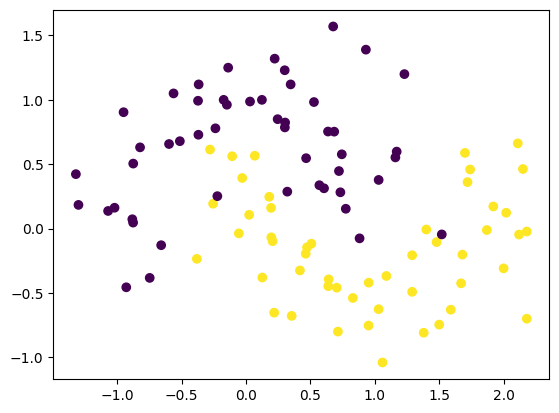

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [47]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Set parameters to 0
model.get_weights()

[array([[ 0.61585885, -0.57325494, -0.06223369, -0.22251716, -0.4697622 ,
          0.48324937, -0.49854967, -0.60840726,  0.5100065 ,  0.56208843],
        [-0.51783675, -0.21343637, -0.1714719 , -0.6924184 ,  0.14234388,
          0.36634105,  0.00841182,  0.00820935, -0.329207  , -0.64436257]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.1500563 ],
        [ 0.4022097 ],
        [-0.519341  ],
        [-0.3291571 ],
        [ 0.08712363],
        [ 0.5035412 ],
        [ 0.55008715],
        [ 0.19024587],
        [-0.52806526],
        [-0.16661292]], dtype=float32),
 array([0.], dtype=float32)]

In [49]:
initial_weights = model.get_weights()

In [50]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [51]:
model.set_weights(initial_weights)

In [52]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [54]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5000 - loss: 2.0323 - val_accuracy: 0.5500 - val_loss: 1.4481
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4766 - loss: 1.9844 - val_accuracy: 0.5500 - val_loss: 1.4340
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5039 - loss: 1.9315 - val_accuracy: 0.5500 - val_loss: 1.4202
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5156 - loss: 1.7891 - val_accuracy: 0.5500 - val_loss: 1.4064
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5117 - loss: 1.8844 - val_accuracy: 0.5500 - val_loss: 1.3926
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5078 - loss: 1.7676 - val_accuracy: 0.5500 - val_loss: 1.3787
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4844 - loss: 1.8190 - val_accuracy: 0.5500 - val_loss: 1.3650
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4688 - loss: 1.9431 - val_accuracy: 0.5500 - val_loss

In [55]:
model.get_weights()

[array([[0.5319439 , 0.5319439 , 0.5319439 , 0.5319439 , 0.5319439 ,
         0.5319439 , 0.5319439 , 0.5319439 , 0.5319439 , 0.5319439 ],
        [0.22421356, 0.22421356, 0.22421356, 0.22421356, 0.22421356,
         0.22421356, 0.22421356, 0.22421356, 0.22421356, 0.22421356]],
       dtype=float32),
 array([0.2511704, 0.2511704, 0.2511704, 0.2511704, 0.2511704, 0.2511704,
        0.2511704, 0.2511704, 0.2511704, 0.2511704], dtype=float32),
 array([[0.2513223],
        [0.2513223],
        [0.2513223],
        [0.2513223],
        [0.2513223],
        [0.2513223],
        [0.2513223],
        [0.2513223],
        [0.2513223],
        [0.2513223]], dtype=float32),
 array([0.2311597], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

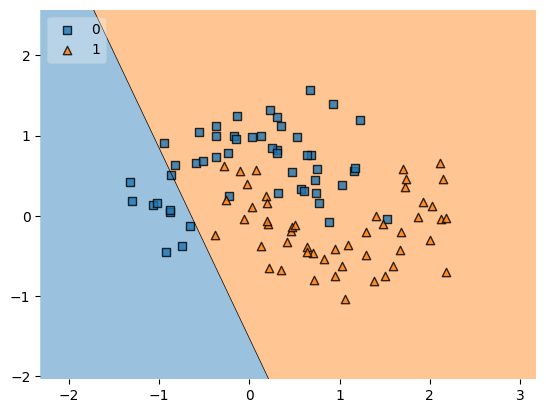

In [56]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)